# 1- Introduction to SVM

Used SVM to build and train a model using human cell records,
and classify cells to whether the samples are benign (mild state) or malignant (evil state).
SVM works by mapping data to a high-dimensional feature space 
so that data points can be categorized, even when the data are not 
otherwise linearly separable (This gets done by kernel function of SVM classifier).
A separator between the categories is found, 
then the data is transformed in such a way that the separator could be drawn as a hyperplane.


# 2- Necessary imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3- About the cancer data

Original Author - UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepositor...] 

Public Source - https://s3-api.us-geo.objectstorage.s...
----------------------------------------
4. Load Data From CSV File 
The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

### row = record
### columd = attribute / dimension
### target = prediction

# 4- Load Data From CSV File

In [8]:
df = pd.read_csv("cell_samples.csv")

In [9]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [12]:
df.shape

(699, 11)

In [13]:
df.size

7689

In [14]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [16]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

# 5- Distribution of the classes

In [17]:
benign = df[df['Class']==2][0:200]
malignant = df[df['Class']==4][0:200]

<Axes: xlabel='Clump', ylabel='UnifSize'>

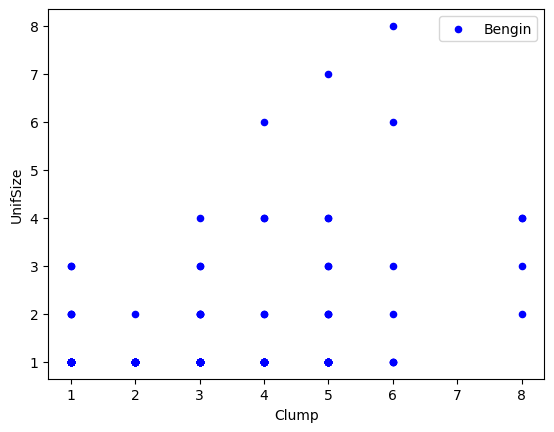

In [19]:
benign.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Bengin')

<Axes: xlabel='Clump', ylabel='UnifSize'>

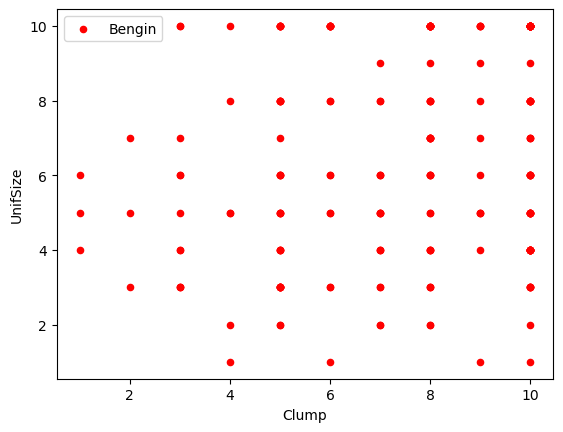

In [21]:
malignant.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Bengin')

# 6- Identifying unwanted rows

In [22]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [27]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

In [28]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
BaraNuc        int32
dtype: object

# 7- Remove unwanted columns

In [29]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class', 'BaraNuc'],
      dtype='object')

In [33]:
feature = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# df 100 rows and 11 columns
# picked 9 columns out of 11

# Independent variable
X = np.asarray(feature)

# dependent varialble
y = np.asarray(df['Class'])

X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

# 8- Divide the data as Train/Test dataset

df 100 rows ->  Train (80 rows) / Test (20 rows)
Train(X, y) ## X itself is a 2D array .   ### y is 1D array
Test(X,y)

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [36]:
x_train.shape

(546, 9)

In [37]:
y_train.shape

(546,)

In [38]:
x_test.shape

(137, 9)

In [39]:
y_test.shape

(137,)

# 9- Modeling (SVM with Scikit-Learn)

 The SVM algorithm offers a choice of kernel functions for performing its processing. 
 Basically  mapping data into a higher dimensional space is called kernelling, The mathmatical function used for
  the transformation is known as the kernel function , and can be differnet types, such as :
                             1.Linear
                             2.Polynomial
                             3.Radial basis function (RBF)
                             4.sigmoid
Each of these functions has it's characteristics, its pros and cons, and its equation, but as there's
 no easy way of knowing which function performs best with any given dataset, we usually choose
  different functoins in turn and compare the results. Let's just use the default,  RBF (Radial Basis funciton for this lab)                           
                                

In [41]:
from sklearn import svm

'''
Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
|                current default is 'auto' which uses (1/ n_features)
                if ''gamma='scale' is pressed then uses 1 / (n_featurs * x.var())
                as value of gamma
|
'''

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

# 10- Evaluation (Results)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

